In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load the data

In [3]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [ ]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [23]:
def compute_loss_mse(y, tx, w):
    """ COMPUTE_LOSS_MSE
        Calculates the loss of a dataset using MSE.

        INPUTS:
        y: an Nx1 array of the output variable
        tx: an Nxd array of the input variable
        w: a dx1 array of the model

        OUTPUTS:
        A scalar of the mean square error of the model applied on the dataset
    """
    return sum((y - tx @ w)**2)/len(y)

In [52]:
w = np.array([50.0,-75.0]).T
compute_loss_mse(y, tx, w)

8402.038090556176

# 2 Grid Search

Fill in the function `grid_search()` below:

In [54]:
def grid_search(y, tx, w0, w1):
    """ GRID_SEARCH
        Performs a naive grid search of parameters w0 and w1 as a model
        for the output variable y

        INPUTS:
        y: an Nx1 array of the output variable
        tx: an Nxd array of the input variable
        w0: An m-dimensional array of the first elements (offset) of the model
        w1: An n-dimensional array of the second elements of the model

        OUTPUTS:
        An m by n array of the costs for each of the combinations of w0 and w1
    """
    losses = np.zeros((len(w0), len(w1)))

    for i in range(0,len(w0)):
      for j in range(0,len(w1)):
        losses[i,j] = compute_loss_mse(y, tx, np.array([w0[i],w1[j]]).T)
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=84.84896629356506, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.392 seconds


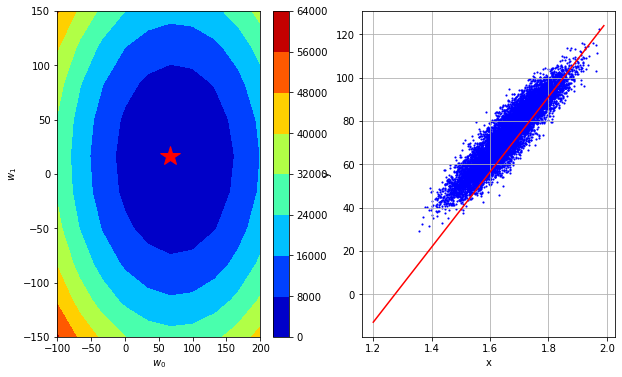

In [56]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [84]:
def compute_gradient_mse(y, tx, w):
    """ COMPUTE_GRADIENT
        Computes the gradient of the MSE of a model applied on a set

        INPUTS:
        y: an Nx1 array of the output variable
        tx: an Nxd array of the input variable
        w: a dx1 array of the model

        OUTPUTS:
        A dx1 array of the gradient 
    """
    return -1/len(y) * tx.T @ (y - tx @ w)

In [87]:
w_test1 = np.array([100,20]).T
w_test2 = np.array([50,10]).T
grad1 = compute_gradient_mse(y,tx,w_test1)
grad2 = compute_gradient_mse(y,tx,w_test2)
print('Gradient 1: %s, Gradient 2: %s' % (grad1, grad2))

Gradient 1: [26.706078    6.52028757], Gradient 2: [-23.293922    -3.47971243]


In [90]:
np.linalg.norm(grad2)

23.55239267824768

Please fill in the functions `gradient_descent` below:

In [95]:
def gradient_descent_mse(y, tx, initial_w, max_iters, gamma):
    """ GRADIENT_DESCENT
        Iterates and finds the best model using gradient descent and MSE

        INPUTS:
        y: an Nx1 array of the output variable
        tx: an Nxd array of the input variable
        initial_w: a dx1 array of the initial model to use
        max_iters: a scalar representing the maximum number of iterations
        gamma: a scalar representing the step size/learning rate

        OUTPUTS:
        losses: a max_iters dimensional array representing losses for iterations
        ws: a max_iters dimensional array representing models over iterations
    """
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute the gradient and loss given the current w
        grad = compute_gradient_mse(y, tx, w)
        loss = compute_loss_mse(y, tx, w)
        # update w by gradient descent
        w = w - gamma*grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [118]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0,0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent_mse(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=5584.473425518329, w0=51.30574540147363, w1=9.435798704492285
Gradient Descent(1/49): loss=530.6049242179226, w0=66.69746902191572, w1=12.26653831583999
Gradient Descent(2/49): loss=75.7567591008824, w0=71.31498610804834, w1=13.11576019924432
Gradient Descent(3/49): loss=34.82042424034895, w0=72.70024123388814, w1=13.370526764265628
Gradient Descent(4/49): loss=31.13615410290091, w0=73.11581777164007, w1=13.446956733772023
Gradient Descent(5/49): loss=30.804569790530707, w0=73.24049073296565, w1=13.469885724623941
Gradient Descent(6/49): loss=30.77472720241716, w0=73.27789262136334, w1=13.476764421879516
Gradient Descent(7/49): loss=30.772041369486974, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=30.771799644523412, w0=73.29247935783843, w1=13.47944711380919
Gradient Descent(9/49): loss=30.771777889276528, w0=73.29348920882516, w1=13.47963283863509
Gradient Descent(10/49): loss=30.771775931304298, w0=73.29379216412119, w1=13.4796

In [117]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure>

In [120]:
batch_iter(y,tx,1)

<generator object batch_iter at 0x7fe02afabd00>

# 4 Stochastic gradient descent

In [135]:
def compute_stoch_gradient(y, tx, w):
    """ COMPUTE_STOCH_GRADIENT
        Compute a stochastic gradient from just few examples n and
        their corresponding y_n labels.
    """
    return -1/len(y) * tx.T @ (y - tx @ w)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    data_size = len(y)
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # generate a batch dataset
        shuffle_indices = np.random.permutation(np.arange(data_size))
        batch_y = y[shuffle_indices < batch_size]
        batch_tx = tx[shuffle_indices < batch_size]
        # compute the gradient and loss given the current w
        grad = compute_gradient_mse(batch_y, batch_tx, w)
        loss = compute_loss_mse(batch_y, batch_tx, w)
        # update w by gradient descent
        w = w - gamma*grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Stochastic gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [138]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 5

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic gradient Descent(0/49): loss=5521.961617011169, w0=51.58871051445896, w1=-1.9784182400472552
Stochastic gradient Descent(1/49): loss=997.7297857823345, w0=72.37653267788635, w1=5.647818512357927
Stochastic gradient Descent(2/49): loss=106.058070031023, w0=73.06016142383397, w1=10.801765802706061
Stochastic gradient Descent(3/49): loss=9.738049399588323, w0=73.95877255769784, w1=10.099604930848912
Stochastic gradient Descent(4/49): loss=41.17379408470084, w0=75.1757316482757, w1=12.933231994377868
Stochastic gradient Descent(5/49): loss=11.651602200971116, w0=75.70941954101188, w1=13.12226916033982
Stochastic gradient Descent(6/49): loss=58.60809508758857, w0=74.00775602763521, w1=13.401058234689298
Stochastic gradient Descent(7/49): loss=22.533252488908172, w0=73.86263013774273, w1=11.04974808127395
Stochastic gradient Descent(8/49): loss=22.446755886284762, w0=74.22911900615418, w1=12.184430891865686
Stochastic gradient Descent(9/49): loss=48.902894290953554, w0=73.85904163

In [139]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure>

# 5 Effect of Outliers

### Exercise 5


# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)